In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# Configurando o matplotlib para mostrar os gráficos no jupyter notebook
%matplotlib inline

# Carregando o dataset
df = pd.read_csv('data/Spotify_Youtube.csv')

In [3]:
df.drop(['Unnamed: 0','Url_spotify', 'Description','Uri','Url_youtube'], axis='columns', inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Key               20716 non-null  float64
 7   Loudness          20716 non-null  float64
 8   Speechiness       20716 non-null  float64
 9   Acousticness      20716 non-null  float64
 10  Instrumentalness  20716 non-null  float64
 11  Liveness          20716 non-null  float64
 12  Valence           20716 non-null  float64
 13  Tempo             20716 non-null  float64
 14  Duration_ms       20716 non-null  float64
 15  Title             20248 non-null  object 
 16  Channel           20248 non-null  object

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
dtype: int64

In [7]:
#df.set_index('Name', inplace=True)


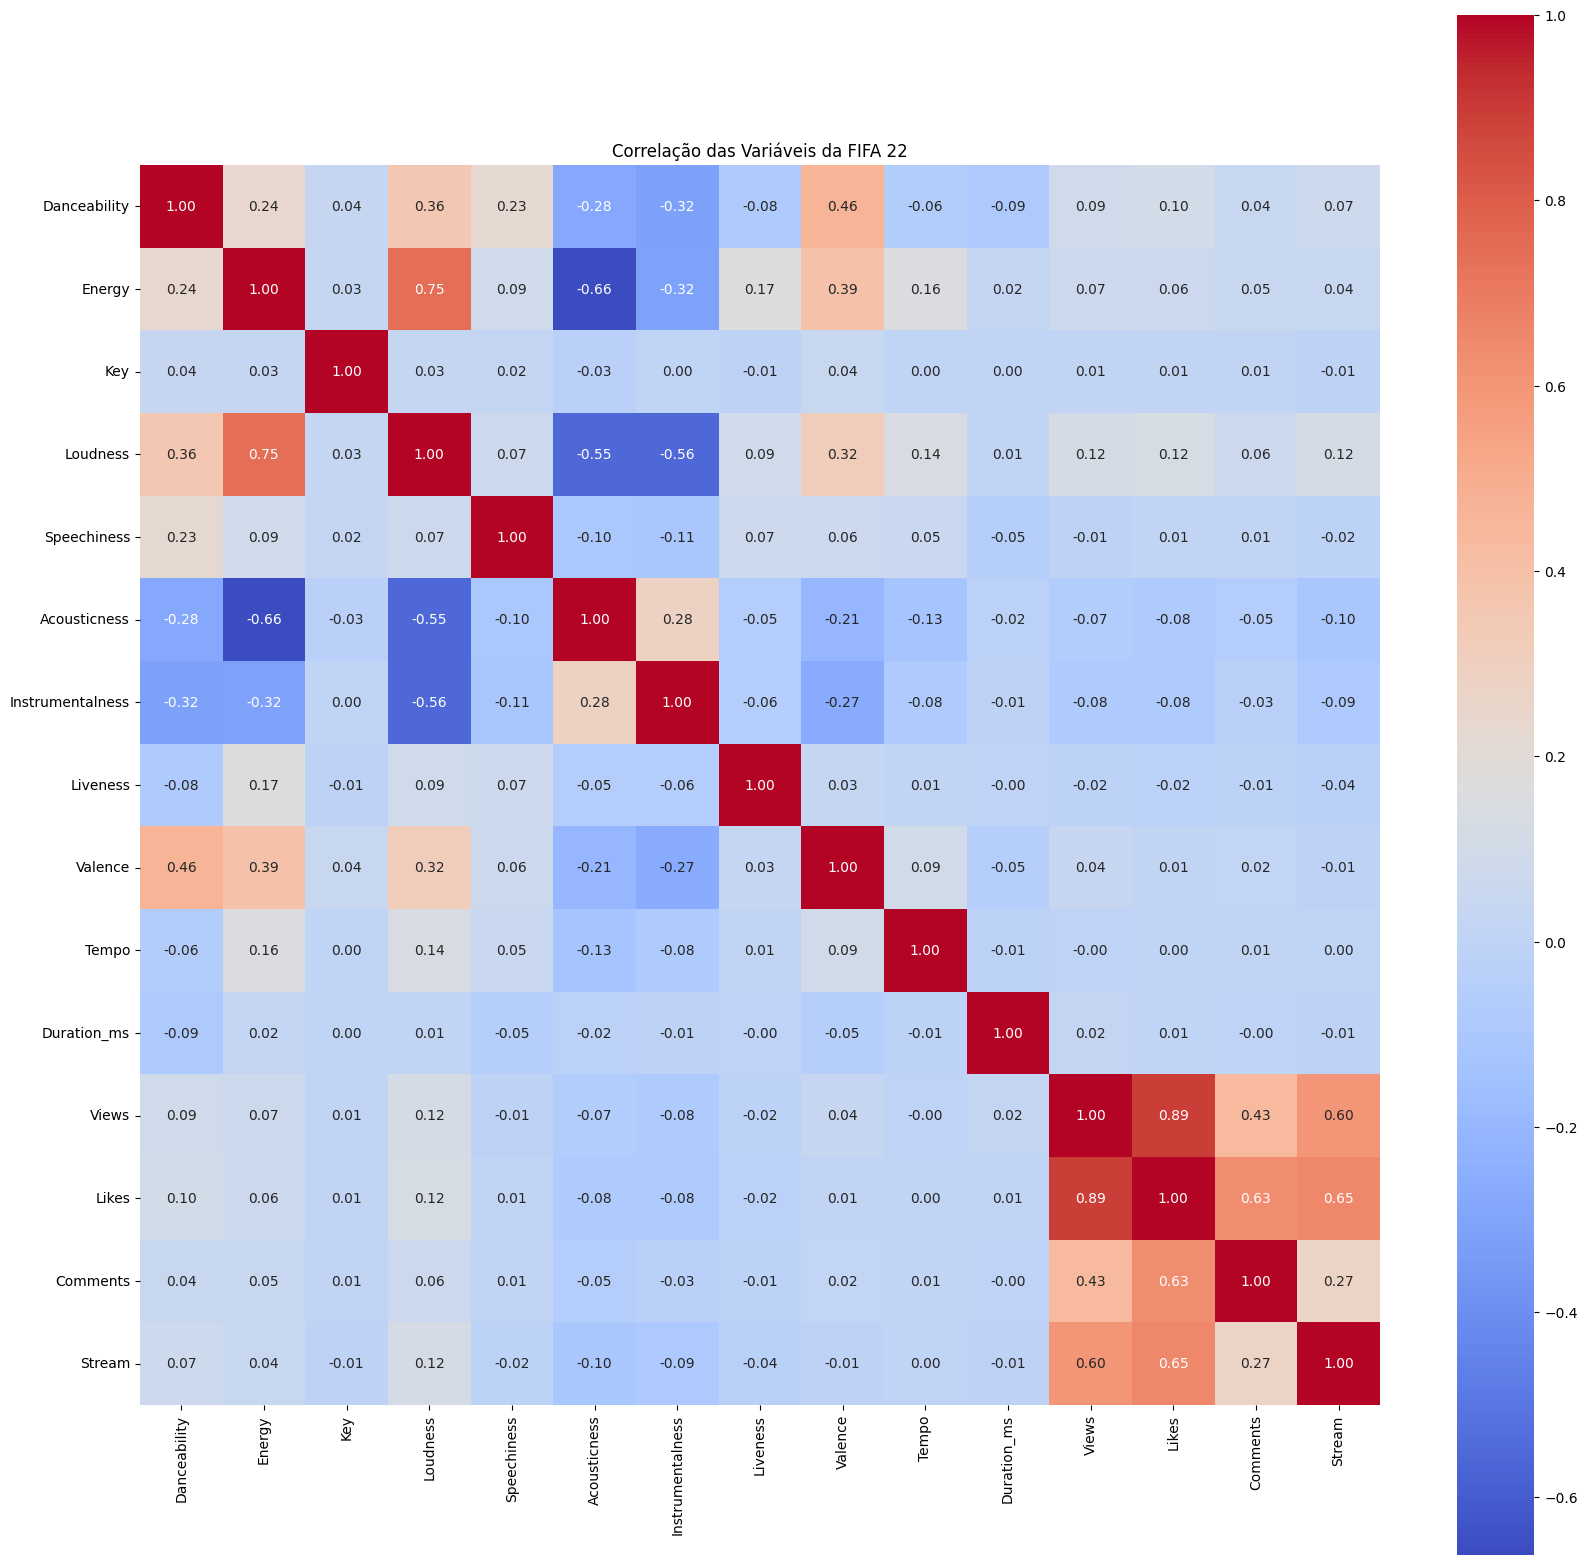

In [25]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True, square=True, fmt=".2f")
plt.title("Correlação das Variáveis da FIFA 22")
plt.show()

In [ ]:
art_group = df.groupby(['Artist'])
art_group.get_group('Adele')

In [21]:
art_group['Title'].value_counts().loc['Adele']

Title
Adele - Easy On Me (Official Video)                        1
Adele - I Drink Wine (Official Video)                      1
Adele - Love In The Dark                                   1
Adele - Make You Feel My Love (Official Video)             1
Adele - Oh My God (Official Video)                         1
Adele - Rolling in the Deep (Official Music Video)         1
Adele - Set Fire To The Rain Official Video                1
Adele - Skyfall (Lyric Video)                              1
Adele - Someone Like You (Official Music Video)            1
Adele - When We Were Young (Live at The Church Studios)    1
Name: Title, dtype: int64

In [33]:
df.sort_values(by='Speechiness', ascending=False).head(10)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream
5158,Sir Arthur Conan Doyle,"Teil 7 - Sherlock Holmes und der blinde Bettler - Die neuen Abenteuer, Folge 50","Sherlock Holmes und der blinde Bettler [Die neuen Abenteuer, Folge 50 (Ungekürzt)]",album,0.625,0.257,1.0,-15.375,0.964,0.1150,0.0,0.283,0.349,170.970,180202.0,Sherlock Holmes e l'ultimo saluto - Arthur Conan Doyle,audioraccontando,27263.0,535.0,14.0,True,True,10540.0
5152,Sir Arthur Conan Doyle,"Teil 1 - Sherlock Holmes und die Geheimwaffe - Sherlock Holmes - Die neuen Romane, Band 54","Sherlock Holmes und die Geheimwaffe [Sherlock Holmes - Die neuen Romane, Band 54 (Ungekürzt)]",album,0.641,0.286,3.0,-14.945,0.962,0.1770,0.0,0.371,0.487,85.538,92378.0,Sherlock Holmes e il mistero di Boscombe Valley - Arthur Conan Doyle,audioraccontando,25108.0,418.0,9.0,True,True,12567.0
996,Bibi Blocksberg,Kapitel 09: Der Hexenbesenausflug (Folge 146),Folge 146: Der Hexenbesenausflug,album,0.649,0.257,1.0,-21.931,0.961,0.7770,0.0,0.358,0.632,90.661,94425.0,Bibi Blocksberg - Der Hexenbesenausflug (Folge 146) | EXTRALANGE Hörprobe,Bibi Blocksberg TV,12010.0,177.0,44.0,True,True,282266.0
13418,Sherlock Holmes,Teil 14 - Fall 53: Die sieben Zinnsoldaten,"Die neuen Fälle, Fall 53: Die sieben Zinnsoldaten",album,0.664,0.682,8.0,-11.758,0.960,0.5230,0.0,0.183,0.475,79.168,201187.0,Die sieben Todsünden (Der Sherlock Holmes Adventkalender 2022 – Teil 14) Krimi Hörbuch,Bookstream Hörbücher,11181.0,202.0,12.0,True,True,102383.0
5161,Sir Arthur Conan Doyle,"Teil 9 - Sherlock Holmes und ein Brief von der Titanic - Die Abenteuer des alten Sherlock Holmes, Folge 28","Sherlock Holmes und ein Brief von der Titanic [Die Abenteuer des alten Sherlock Holmes, Folge 28 (Ungekürzt)]",album,0.674,0.316,1.0,-19.952,0.960,0.3350,0.0,0.269,0.389,79.324,184499.0,"Sherlock Holmes - Die neuen Fälle, Fall 08: Der grüne Admiral (Komplettes Hörspiel)",Maritim Verlag,652505.0,4363.0,344.0,True,True,8053.0
5159,Sir Arthur Conan Doyle,"Teil 5 - Sherlock Holmes und der blinde Bettler - Die neuen Abenteuer, Folge 50","Sherlock Holmes und der blinde Bettler [Die neuen Abenteuer, Folge 50 (Ungekürzt)]",album,0.675,0.323,2.0,-15.074,0.959,0.0907,0.0,0.225,0.436,145.349,181574.0,Sir Arthur Conan Doyle - Memoriile lui Sherlock Holmes - Ultima problemã 🎧 Audiobook,Audio Libris Channel,3526.0,116.0,12.0,True,True,10306.0
3965,Fünf Freunde,152 - und das Geheimnis der Kelly Brüder - Teil 10,Folge 152: und das Geheimnis der Kelly Brüder,album,0.644,0.326,1.0,-19.431,0.959,0.5190,0.0,0.483,0.485,63.313,183000.0,Fünf Freunde Teil 10 - Fünf Freunde im Nebel,Stefan Sauerwald,43045.0,289.0,17.0,False,False,40340.0
13410,Sherlock Holmes,Teil 1 - Fall 53: Die sieben Zinnsoldaten,"Die neuen Fälle, Fall 53: Die sieben Zinnsoldaten",album,0.538,0.804,8.0,-10.327,0.956,0.5890,0.0,0.708,0.314,172.743,200093.0,Sherlock Holmes & il dottor Watson 1 - Un movente per uccidere con Geoffrey Withehead,cuccioloebeppe,299036.0,1129.0,91.0,False,False,102172.0
1992,Benjamin Blümchen,Kapitel 03: Das große Gewitter (Folge 153),Folge 153: Das große Gewitter,album,0.612,0.485,5.0,-15.670,0.954,0.1540,0.0,0.308,0.623,69.149,94370.0,Benjamin Blümchen - Das große Gewitter (Folge 153) | EXTRALANGE Hörprobe,Benjamin Blümchen TV,6583.0,62.0,0.0,True,True,67348.0
5156,Sir Arthur Conan Doyle,"Teil 8 - Sherlock Holmes und der blinde Bettler - Die neuen Abenteuer, Folge 50","Sherlock Holmes und der blinde Bettler [Die neuen Abenteuer, Folge 50 (Ungekürzt)]",album,0.711,0.297,11.0,-16.526,0.953,0.1180,0.0,0.205,0.300,126.042,184898.0,Sir Arthur Conan Doyle - Memoriile lui Sherlock Holmes - Ultima problemã 🎧 Audiobook,Audio Libris Channel,3526.0,116.0,12.0,True,True,10701.0
